## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [1]:
from gensim.models.word2vec import LineSentence, Word2Vec

vec_out = "./word_vec.vector"
zhwiki_out = "./zhwiki_word"

In [2]:
model = Word2Vec.load(vec_out)

/Users/yeah/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [3]:
 model.wv['中国']

array([ 1.25967300e+00, -1.62455213e+00, -2.29488397e+00,  1.69300079e-01,
       -3.72592121e-01, -3.05349874e+00, -1.66066372e+00,  1.11630106e+00,
        7.99556151e-02,  6.29446447e-01,  1.10502124e+00,  1.84524202e+00,
       -3.40193963e+00,  4.38416451e-01,  8.25208366e-01,  1.75708354e+00,
        2.73590708e+00, -5.20788431e-01,  1.54273463e-02,  8.83206010e-01,
       -1.18816495e-01,  1.03448236e+00, -1.04351497e+00,  8.84893596e-01,
        1.27781148e-03,  2.81384200e-01,  1.87493014e+00, -1.20053411e+00,
       -2.40644693e+00,  1.47244453e+00,  8.48518848e-01, -2.90746760e+00,
       -3.07951522e+00,  6.43994033e-01, -7.64475048e-01,  1.21325064e+00,
       -2.38609147e+00, -1.78386021e+00, -7.05391943e-01,  3.07278484e-01,
        4.16963249e-01, -7.32687056e-01,  4.32299972e-01, -1.13739288e+00,
        1.70198262e+00,  2.77997756e+00,  1.07136023e+00,  2.03266427e-01,
        6.99570179e-01, -2.33413443e-01, -4.98221040e-01,  2.44138408e+00,
        6.84110403e-01,  

In [21]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model, size):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in list(model.wv.vocab)[:size]:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/yeah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


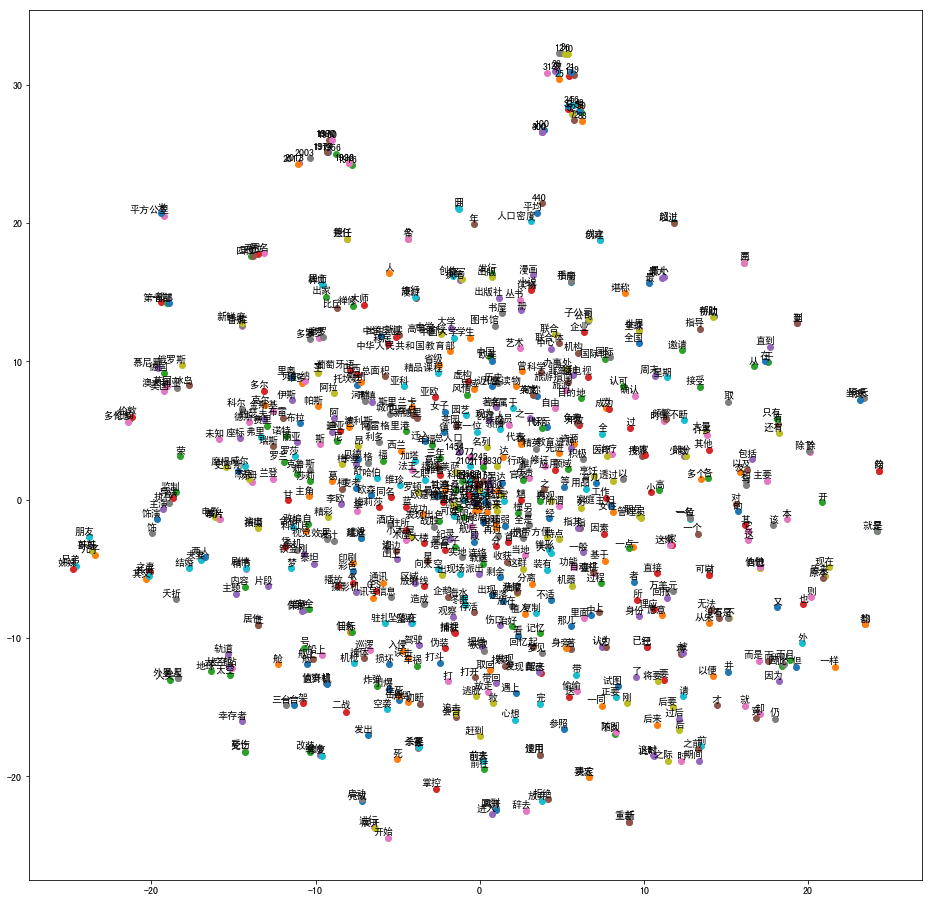

In [28]:
tsne_plot(model, 700)

In [35]:
model.similarity(u'美丽',u'漂亮')

/Users/yeah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6302464088785131

In [36]:
model.similar_by_vector(model.wv["美丽"])

/Users/yeah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.


[('美丽', 1.0),
 ('迷人', 0.6541872024536133),
 ('可爱', 0.63238126039505),
 ('漂亮', 0.6302464008331299),
 ('最美', 0.6231306791305542),
 ('甜美', 0.6083269119262695),
 ('优美', 0.5890986919403076),
 ('温柔', 0.5885863304138184),
 ('美妙', 0.5880288481712341),
 ('美好', 0.5851168036460876)]

In [37]:
model.similar_by_word("美丽")

/Users/yeah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('迷人', 0.6541872024536133),
 ('可爱', 0.63238126039505),
 ('漂亮', 0.6302464008331299),
 ('最美', 0.6231306791305542),
 ('甜美', 0.6083269119262695),
 ('优美', 0.5890986919403076),
 ('温柔', 0.5885863304138184),
 ('美妙', 0.5880288481712341),
 ('美好', 0.5851168632507324),
 ('灿烂', 0.580214262008667)]